In [71]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
from sklearn.cluster import KMeans 

In [45]:
# importing dataset and getting rid of the null values
data=pd.read_csv('CC GENERAL.csv')
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median())
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean())
data=data.drop("CUST_ID", axis=1)
print("NAN:",data.isnull().sum().sum())
data.head(9)

NAN: 0


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12


In [52]:
# Using hierarchical clustering to identify the inherent groupings within the data
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
yhat = model.fit_predict(data)
print(yhat)

[0 0 0 ... 0 0 0]


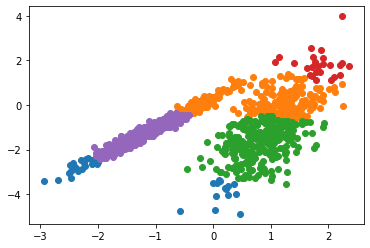

In [61]:
# agglomerative clustering
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    row_ix = where(yhat == cluster)
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
pyplot.show()

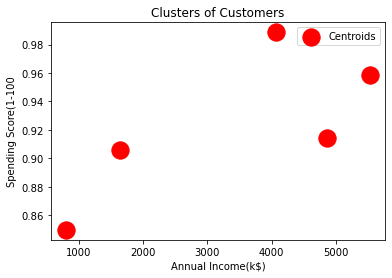

In [84]:
# Plotting the dendrogram. Using k-means clustering
kmeans=KMeans(n_clusters=5, random_state=0)  
kmeans.fit(data)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.legend()
plt.show()

In [69]:
kmeans.predict(data)
kmeans.cluster_centers_ 

array([[4.05814769e+03, 9.88636375e-01, 1.02737875e+03, 1.18389464e+02,
        9.08989286e+02, 9.22757849e+02, 4.71320321e-01, 3.92315536e-02,
        4.41152625e-01, 1.05654714e-01, 3.01785714e+00, 1.86250000e+01,
        4.26785714e+03, 1.62493914e+03, 2.27600316e+04, 1.48808929e-03,
        1.19107143e+01],
       [5.52912349e+03, 9.58830746e-01, 1.51484243e+03, 9.26932611e+02,
        5.87986157e+02, 3.93048725e+03, 4.67373511e-01, 2.61415446e-01,
        3.46520397e-01, 3.35192983e-01, 9.87457241e+00, 2.13432155e+01,
        1.08760029e+04, 4.10055608e+03, 1.92163876e+03, 6.91060536e-02,
        1.16659065e+01],
       [7.99238708e+02, 8.49598503e-01, 4.90793472e+02, 2.36356997e+02,
        2.54734938e+02, 4.93493444e+02, 4.47110406e-01, 1.27362243e-01,
        3.44085965e-01, 1.10875207e-01, 2.32356174e+00, 9.27171125e+00,
        2.21243710e+03, 8.85466245e+02, 5.08275001e+02, 1.45571023e-01,
        1.13732136e+01],
       [1.64655232e+03, 9.05530036e-01, 1.47569209e+03, 9.236

In [81]:
# Trying different k values and selecting the best one
Sum_of_squared_distances=[]
k=range(1,15)
for k in k:
    km=KMeans(n_clusters=k)
    km=km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)
    print("k:",k)

k: 1
k: 2
k: 3
k: 4
k: 5
k: 6
k: 7
k: 8
k: 9
k: 10
k: 11
k: 12
k: 13
k: 14


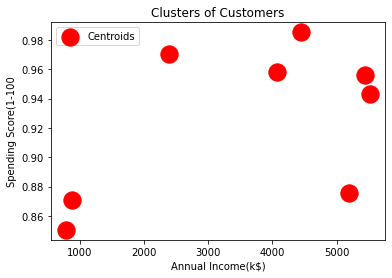

In [86]:
# trying K=8
kmeans=KMeans(n_clusters=8, random_state=0)  
kmeans.fit(data)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.legend()
plt.show()

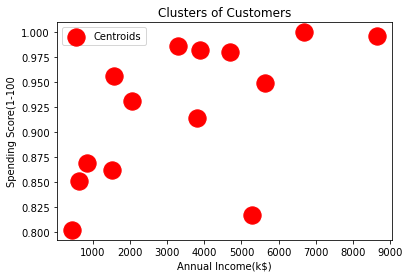

In [88]:
# trying K=14
kmeans=KMeans(n_clusters=14, random_state=0)  
kmeans.fit(data)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.legend()
plt.show()

In [ ]:
# K=14 is the best value between "8","5" and "14"